# **Importing the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd 'gdrive/MyDrive/ML Lab Datasets'

/content/gdrive/MyDrive/ML Lab Datasets


# **Installing Libraries**

In [5]:
!pip install mat4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mat4py import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
data=loadmat('Matlab_accidents.mat')

# **Preprocessing the Data**

In [8]:
data_accidents = data['accidents']

In [9]:
df = pd.DataFrame(data_accidents['hwydata'],columns = data_accidents['hwyheaders'])
states = [y[0] for y in data_accidents["statelabel"]]
df.insert(loc = 0,column = 'States',value = states)

In [10]:
df.head()

,States,Census ID,Centroid Longitude,Centroid Latitude,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions),Miles traveled per vehicle,Fatalities per 100K licensed drivers,Fatalities per 100K registered vehicles,Fatalities per 100M vehicle-miles traveled,Fatalities involving high blood alcohol,Percent Alcohol-Related,Total Population,Urban Population,Rural Population,Pct Urban Population
0,Wyoming,56.0,-107.555625,43.032664,164.0,380.180,671.529,9261.0,13790.915954,43.137461,24.421879,1.770867,54.0,32.926829,493782.0,322073.0,171709.0,65.225747
1,District of Columbia,11.0,-77.026928,38.892064,43.0,349.122,240.403,3742.0,15565.529548,12.316611,17.886632,1.149118,12.0,27.906977,572059.0,572059.0,0.0,100.000000
2,Vermont,50.0,-72.556496,44.043498,98.0,550.462,551.516,7855.0,14242.560506,17.803227,17.769203,1.247613,20.0,20.408163,608827.0,232550.0,376277.0,38.196401
3,Alaska,2.0,-152.459342,64.609656,101.0,482.532,681.115,4990.0,7326.222444,20.931254,14.828627,2.024048,30.0,29.702970,626932.0,411955.0,214977.0,65.709678
4,North Dakota,38.0,-99.499793,47.469117,100.0,461.780,721.835,7594.0,10520.409789,21.655334,13.853581,1.316829,35.0,35.000000,642200.0,358394.0,283806.0,55.807225


In [11]:
df = pd.DataFrame([df['Traffic fatalities'],df['Licensed drivers (thousands)'],df['Registered vehicles (thousands)'],df['Vehicle-miles traveled (millions)']]).transpose()

In [12]:
df.head()

,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions)
0,164.0,380.180,671.529,9261.0
1,43.0,349.122,240.403,3742.0
2,98.0,550.462,551.516,7855.0
3,101.0,482.532,681.115,4990.0
4,100.0,461.780,721.835,7594.0


In [13]:
for column in df:
  df[column] = df[column]/np.amax(df[column])

## **Splitting Dataset into test and train**

In [14]:
train , test = train_test_split(df,train_size = 0.7,shuffle = True)

**Creating theta matrix and y for training and testing**


In [15]:
y_train = np.array(train.iloc[:, 0])
y_train = y_train.reshape([35,1])
x_train = np.array(train.iloc[:, 1:])
on_train = np.ones([train.shape[0],1])
theta_train = np.hstack((on_train,x_train))

In [16]:
y_test = np.array(test.iloc[:, 0])
x_test = np.array(test.iloc[:, 1:])
on_test = np.ones([test.shape[0],1])
y_test = y_test.reshape([y_test.shape[0],1])
theta_test = np.hstack((on_test,x_test))

**Calculating optimum weights (using pseudo inverse) and predicting output**

In [17]:
weight_opt = np.matmul(np.linalg.pinv(theta_train),y_train)
y_pred = np.matmul(theta_test,weight_opt)

**Plotting ground truth and predicted outputs**

0.9480297080433806


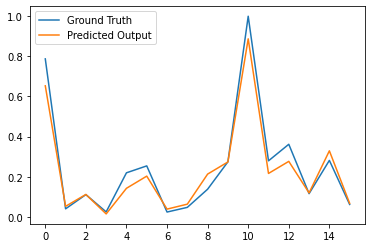

In [28]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Ground Truth','Predicted Output'])

**Calculating mean squared error , root mean squared error and mean absolute error**

In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)


In [30]:
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absolute Error: ",mae)

Mean Squared Error:  0.003703069670117371
Root Mean Squared Error:  0.060852852604601625
Mean Absolute Error:  0.04440426308594414


# **Finding optimum weights using Gradiend Descent**

**Randomly initialising weights**

In [31]:
grad_weights = np.random.randn(len(theta_train[0]), 1)

**Implementing Gradient Descent and predicting output**

In [32]:
iterations = 1000
learning_rate = 0.03

for i in range(iterations):
  delta_e = np.matmul(theta_train.transpose(),(np.matmul(theta_train,grad_weights)-y_train))
  grad_weights = grad_weights - learning_rate * delta_e 
ygrad_pred = np.matmul(theta_test,grad_weights)

**Plotting ground truth and predicted outputs**

0.9574034456215859


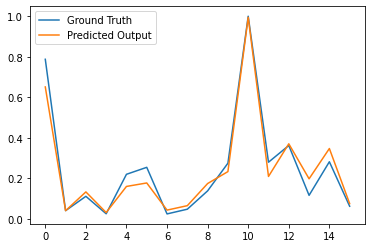

In [35]:
plt.plot(y_test)
plt.plot(ygrad_pred)
print(r2_score(y_test,ygrad_pred))
plt.legend(['Ground Truth','Predicted Output'])

**Calculating mean squared error , root mean squared error and mean absolute error**

In [36]:
mse_g = mean_squared_error(y_test, ygrad_pred)
rmse_g = mean_squared_error(y_test, ygrad_pred, squared = False)
mae_g = mean_absolute_error(y_test, ygrad_pred)
print(mse_g,rmse_g,mae_g)

0.003035157252952849 0.05509226128008224 0.041220707075966555


In [37]:
print("Mean Squared Error: ",mse_g)
print("Root Mean Squared Error: ",rmse_g)
print("Mean Absolute Error: ",mae_g)

Mean Squared Error:  0.003035157252952849
Root Mean Squared Error:  0.05509226128008224
Mean Absolute Error:  0.041220707075966555


# Changing relationship between input and output variables 

**Recalculating Theta matrix**

In [38]:
theta_train_dash = np.hstack((on_train,np.reshape(np.square(x_train.T[0]).T,(35,1)),x_train))
theta_test_dash = np.hstack((on_test,np.reshape(np.square(x_test.T[0]).T,(16,1)),x_test))

**Calculating optimum weights (using pseudo inverse) and predicting output**

In [39]:
weight_opt_dash = np.matmul(np.linalg.pinv(theta_train_dash),y_train)
y_pred_dash = np.matmul(theta_test_dash,weight_opt_dash)

**Plotting ground truth and predicted outputs**

0.9586641095309479


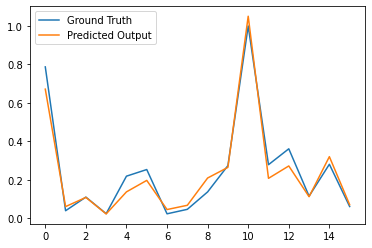

In [40]:
plt.plot(y_test)
plt.plot(y_pred_dash)
print(r2_score(y_test,y_pred_dash))
plt.legend(['Ground Truth','Predicted Output'])

**Calculating mean squared error , root mean squared error and mean absolute error**

In [41]:
mse_dash = mean_squared_error(y_test, y_pred_dash)
rmse_dash = mean_squared_error(y_test, y_pred_dash, squared = False)
mae_dash = mean_absolute_error(y_test, y_pred_dash)
print(mse_dash,rmse_dash,mae_dash)

0.0029453304286035297 0.054270898542437364 0.04156405753124275


In [42]:
print("Mean Squared Error: ",mse_dash)
print("Root Mean Squared Error: ",rmse_dash)
print("Mean Absolute Error: ",mae_dash)

Mean Squared Error:  0.0029453304286035297
Root Mean Squared Error:  0.054270898542437364
Mean Absolute Error:  0.04156405753124275
